## https://realpython.com/python-keras-text-classification ##

In [1]:
import pandas as pd

# 1. Choosing a Data Set #

corpus: collection of texts 

vocabulary: list of words which occurred in the text, where each word has its own index

feature vector: result of vectorising a sentence, can be a numerical or categorical feature; in this case a count for each word in the vocabulary


In [2]:
filepath_dict = {'yelp':   'sentiment_analysis/yelp_labelled.txt',
                 'amazon': 'sentiment_analysis/amazon_cells_labelled.txt',
                 'imdb':   'sentiment_analysis/imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object


In [3]:
sentences = ['John likes ice cream', 'John hates chocolate.']

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=False, max_df=1.0, max_features=None, min_df=0,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [5]:
vectorizer.fit(sentences)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=False, max_df=1.0, max_features=None, min_df=0,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [6]:
vectorizer.vocabulary_

{'John': 0, 'likes': 5, 'ice': 4, 'cream': 2, 'hates': 3, 'chocolate': 1}

In [7]:
vectorizer.transform(sentences)

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [8]:
vectorizer.transform(sentences).toarray()

array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]], dtype=int64)

This is considered a **Bag-of-words (BOW) model**, which is a common way in NLP to create vectors out of text. Each document is represented as a vector. You can use these vectors now as feature vectors for a machine learning model. 

# 2. Defining a Baseline Model

if a model generalises well: whether the model is able to perform well on data it has not seen before

overfitting: when a model is trained too well; it memorised the training data resulting in high training accuracy but low testing accuracy

In [9]:
from sklearn.model_selection import train_test_split

df_yelp = df[df['source'] == 'yelp']
df_yelp.head()


,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp


In [10]:
# .values returns a NumPy array instead of a Pandas Series object which is in this context easier to work with
sentences = df_yelp['sentence'].values
sentences

array(['Wow... Loved this place.', 'Crust is not good.',
       'Not tasty and the texture was just nasty.',
       'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
       'The selection on the menu was great and so were the prices.',
       'Now I am getting angry and I want my damn pho.',
       "Honeslty it didn't taste THAT fresh.)",
       'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
       'The fries were great too.', 'A great touch.',
       'Service was very prompt.', 'Would not go back.',
       'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.',
       'I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!',
       'I was disgusted because I was pretty sure that was human hair.',
       'I was shocked because no signs indicate cash only.',
       'Highly recommended.', 'Waitress was a little slow in service.',

In [11]:
y = df_yelp['label'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<750x1714 sparse matrix of type '<class 'numpy.int64'>'
	with 7368 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

# Fit the training data then test it to get accuracy score
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.796


In [14]:
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values

    sentences_train, sentences_test, y_train, y_test = train_test_split(
        sentences, y, test_size=0.25, random_state=1000)
    
    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)
    
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print(f'Accuracy for {source} data: {score}')

Accuracy for yelp data: 0.796
Accuracy for amazon data: 0.796
Accuracy for imdb data: 0.7486631016042781


# 3. A Primer on (Deep) Neural Networks

[Deep Learning book](http://www.deeplearningbook.org/) by Ian Goodfellow to dig deeper into the math.
 
Neural networks have moved into several fields involving classification, regression and even generative models. The most prevalent fields include computer vision, voice recognition and NLP.

intuitive visual understanding of the math involved, you can check out the [YouTube Playlist](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) by Grant Sanderson.

Optimisation methods (also called optimisers) like the gradient descent reduce the error between the computed and the desired output (also called target output). The error is determined by a loss function whose loss we want to minimise with the optimiser. Most common optimizer currently used is called Adam which has a good performance in various problems.

You can also use different loss functions like the binary cross entropy loss function which is used for binary classification problems. Be sure to experiment with the various available methods and tools.

# 4. Keras

Keras is a deep learning and neural networks API by François Chollet which is capable of running on top of Tensorflow (Google), Theano or CNTK (Microsoft). 

Great way to start experimenting with neural networks without having to implement every layer and piece on your own. For example Tensorflow is a great machine learning library, but you have to implement a lot of boilerplate code to have a model running.

In [15]:
from keras.models import Sequential
from keras import layers

# Add layers 1 by 1 to build Sequential model, which is a linear stack of layers, where you can use the large variety of available layers in Keras
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))  # ReLU for hidden layers
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [16]:
# Configure learning process with .compile() method which specifies the optimiser and loss function
# Can add list of metrics which can be used later for evaluation
# .summary() gives an overview of model and number of parameters available for training

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                25060     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 25,071
Trainable params: 25,071
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Now you can use the .evaluate() method to measure the accuracy of the model. You can do this both for the training data and testing data. We expect that the training data has a higher accuracy then for the testing data. The longer you would train a neural network, the more likely it is that it starts overfitting.

Note that if you rerun the .fit() method, you’ll start off with the computed weights from the previous training. Make sure to **compile the model again** before you start training the model again.

In [18]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

561/561 [==============================] - 0s 56us/step
Training Accuracy: 1.0000
Testing Accuracy:  0.7807


To make your life easier, you can use this little helper function to visualize the loss and accuracy for the training and testing data based on the Historycallback.

This callback, which is automatically applied to each Keras model, records the loss and additional metrics that can be added in the .fit() method. In this case, we are only interested in the accuracy. This helper function employs the matplotlib plotting library.

In [19]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [20]:
# To use this function, simply call plot_history() with the collected accuracy and loss inside the history dictionary:
history

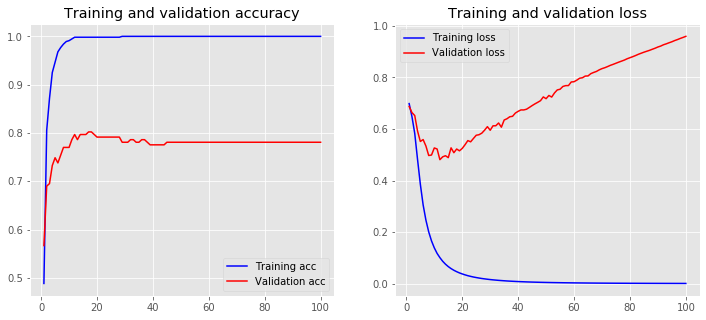

In [21]:
plot_history(history)

A good way to see when the model starts overfitting is when the loss of the validation data starts rising again. This tends to be a good point to stop the model. You can see this around 20-40 epochs in this training.

### Difference between testing and validation sets

Note: When training neural networks, you should use a separate testing and validation set. What you would usually do is take the model with the highest validation accuracy and then test the model with the testing set.

This makes sure that you don’t overfit the model. Using the validation set to choose the best model is a form of data leakage (or “cheating”) to get to pick the result that produced the best test score out of hundreds of them. Data leakage happens when information outside the training data set is used in the model.

In this case, our testing and validation set are the same, since we have a smaller sample size. In the next part, you’ll see a different way to represent words as vectors.

# 5. Word Embeddings

In the previous BOW model, you have seen how to represent a whole sequence of words as a single feature vector. Now you will see how to represent each word as a vector. Some ways to vectorise text:

1. Words represented by each word as a vector
9. Characters represented by each character as a vector
6. N-grams of words/characters represented as a vector (N-grams are overlapping groups of multiple succeeding words/characters in the text)

Two possible ways to represent a word as a vector are one-hot encoding and word embeddings.

## One-Hot Encoding

In [22]:
cities = ['London', 'Berlin', 'Berlin', 'New York', 'London']
cities

['London', 'Berlin', 'Berlin', 'New York', 'London']

In [23]:
from sklearn.preprocessing import LabelEncoder

#  Use scikit-learn and the LabelEncoder to encode the list of cities into categorical integer values
encoder = LabelEncoder()
city_labels = encoder.fit_transform(cities)
city_labels


array([1, 0, 0, 2, 1], dtype=int64)

In [24]:
from sklearn.preprocessing import OneHotEncoder

# Use the OneHotEncoder provided by scikit-learn to encode the categorical values into a one-hot encoded numeric array. 
# OneHotEncoder expects each categorical value to be in a separate row, so reshape the array then apply the encoder
encoder = OneHotEncoder(sparse=False)
city_labels = city_labels.reshape((5, 1))
encoder.fit_transform(city_labels)

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

The array's column headers would be 0, 1, 2. 1st row shows one '1', 2nd row shows one '0', 3rd shows another '0', and so on.

One use case for this encoding is of course words in a text but it is most prominently used for categories. Such categories can be for example city, department, or other categories.

## Word Embeddings

This method represents words as dense word vectors (also called word embeddings) which are trained unlike the one-hot encoding which are hardcoded. This means that the word embeddings collect more information into fewer dimensions.

Word embeddings do not understand the text as a human would, but they rather map the statistical structure of the language used in the corpus. Their aim is to map semantic meaning into a geometric space.

E.g. King - Man + Woman = Queen

In [25]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])


I am a fan of his ... This movie sucked really bad.  
[7, 150, 2, 932, 4, 49, 6, 11, 563, 45, 30]


In [26]:
for word in ['the', 'all', 'happy', 'sad']:
    # Give me the ranking (index) of each word in the list
    print(f'{word}: {tokenizer.word_index[word]}')

the: 1
all: 27


KeyError: 'happy'

Note: Pay close attention to the difference between this technique and the X_train that was produced by scikit-learn’s CountVectorizer.

With CountVectorizer, we had stacked vectors of word counts, and each vector was the same length (the size of the total corpus vocabulary). With Tokenizer, the resulting vectors equal the length of each text, and the numbers don’t denote counts, but rather correspond to the word values from the dictionary tokenizer.word_index.

One problem that we have is that each text sequence has in most cases **different length of words**. To counter this, you can use **pad_sequence()** which simply pads the sequence of words with zeros. By default, it prepends zeros but we want to append them. Typically it does not matter whether you prepend or append zeros.

Additionally you would want to add a **maxlen parameter** to specify how long the sequences should be. This cuts sequences that exceed that number. In the following code, you can see how to pad sequences with Keras:

In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

# Append 0s padding for train and test
# This is why 0 is a reserved index
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# print all indexes for first sentence
print(X_train[0, :])

## Keras Embedding Layer

Embedding Layer of Keras takes previously calculated integers and maps them to a dense vector of the emedding. Need these parameters:

input_dim: vocab size

output_dim: dense vector size

input_length: sequence length

 One way would be to take the output of the embedding layer and plug it into a Dense layer. In order to do this you have to add a **Flatten** layer in between that prepares the sequential input for the Dense layer:

In [ ]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

You can now see that we have 87350 new parameters to train. This number comes from vocab_size times the embedding_dim. These weights of the embedding layer are initialized with random weights and are then adjusted through backpropagation during training. 

Now Train.

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Not good.

Another way to work with embeddings is by using a MaxPooling1D/AveragePooling1D or a GlobalMaxPooling1D/GlobalAveragePooling1D layer after the embedding. You can think of the pooling layers as a way to downsample (a way to reduce the size of) the incoming feature vectors.

In the case of max pooling you take the maximum value of all features in the pool for each feature dimension.

In [ ]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

## Using Pretrained Word Embeddings

We just saw an example of jointly learning word embeddings incorporated into the larger model that we want to solve.

An alternative is to use a precomputed embedding space that utilizes a much larger corpus. It is possible to precompute word embeddings by simply training them on a large corpus of text. 
Among the most popular methods are Word2Vec and GloVe.

Note that those are different approaches with the same goal. Word2Vec achieves this by employing neural networks and GloVe achieves this with a co-occurrence matrix and by using matrix factorization. In both cases you are dealing with dimensionality reduction, but Word2Vec is more accurate and GloVe is faster to compute.


Since you don’t need all words, you can focus on only the words that we have in our vocabulary. Since we have only a limited number of words in our vocabulary, we can **skip most of the 40000 words in the pretrained word embeddings**:

head -n 1 data/glove_word_embeddings/glove.6B.50d.txt | cut -c-50

In [ ]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding="utf-8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

Use this function now to retrieve the embedding matrix:

In [ ]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix(
    'sentiment_analysis/glove.6B.50d.txt',
    tokenizer.word_index, embedding_dim)

In [ ]:
embedding_matrix

First, let’s have a quick look how many of the embedding vectors are nonzero:

In [ ]:
nonzero_elements_1 = np.count_nonzero(embedding_matrix, axis=1)
nonzero_elements_1

In [ ]:
nonzero_elements = np.count_nonzero(nonzero_elements_1)
nonzero_elements

In [ ]:
nonzero_elements / vocab_size

This means 95.1% of the vocabulary is covered by the pretrained model, which is a good coverage of our vocabulary.

Let’s go ahead and use the previous network with global max pooling and see if we can improve this model. When you use pretrained word embeddings you have the choice to either allow the embedding to be updated during training or only use the resulting embedding vectors as they are.

Let’s have a look at the performance when using the GlobalMaxPool1D layer:

In [ ]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Since the word embeddings are not additionally trained, it is expected to be lower. But let’s now see how this performs if we allow the embedding to be trained by using trainable=True:

In [ ]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

You can see that it is most effective to allow the embeddings to be trained. In our case it did not help much but this does not have to be because of pretrained word embeddings.

# 6. Convolutional Neural Networks (CNN)

Covnets have revolutionized image classification and computer vision by being able to extract features from images and using them in neural networks. The properties that made them useful in image processing makes them also handy for sequence processing. You can imagine a CNN as a specialized neural network that is able to detect specific patterns.

A CNN has hidden layers which are called convolutional layers. When you think of images, a computer has to deal with a two dimensional matrix of numbers and therefore you need some way to detect features in this matrix. These convolutional layers are able to detect edges, corners and other kinds of textures which makes them such a special tool. The convolutional layer consists of multiple filters which are slid across the image and are able to detect specific features.

This is the very core of the technique, the mathematical process of convolution. With each convolutional layer the network is able to detect more complex patterns.

For this layer, parameters for now are the number of filters, the kernel size, and the activation function. Add this layer in between the Embedding layer and the GlobalMaxPool1D layer:

In [ ]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu')) ###
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

You can see that 80% accuracy seems to be tough hurdle to overcome with this data set and a CNN might not be well equipped. The reason for such a plateau might be that:

1. There are not enough training samples
5. The data you have does not generalize well
6. Missing focus on tweaking the hyperparameters

CNNs work best with **large** training sets where they are able to **find generalizations** where a simple model like logistic regression won’t be able.

# 7. Hyperparameters Optimisation

As you saw in the models that we have used so far, even with simpler ones, you had a large number of parameters to tweak and choose from. Those parameters are called hyperparameters. This is the most time consuming part of machine learning and sadly there are no one-fits-all solutions ready.

grid search: takes a list of parameters and runs model with each parameter combination (mos thorough but most computationally heavy)

random search: takes random combinations of parameters

In order to apply random search with Keras, you will need to use the KerasClassifier which serves as a wrapper for the scikit-learn API. With this wrapper you are able to use the various tools available with scikit-learn like cross-validation. The class that you need is RandomizedSearchCV which implements random search with cross-validation. 

cross-validation: a way to validate the model and take the whole data set and separate it into multiple testing and training data sets. 

nested cross-validation: used when the hyperparameters also need to be optimized. This is used because the resulting non-nested CV model has a bias toward the data set which can lead to an overly optimistic score. You see, when doing hyperparameter optimization as we did in the following example, we are picking the best hyperparameters for that specific training set but this does not mean that these hyperparameters generalize the best.

k-fold cross-validation: data set is partitioned into k equal sized sets, each set is used for testing and the rest of the partitions are used for training. This enables you to run k different runs, where each partition is used once as a testing set. The higher the k is the more accurate the model evaluation is, but the smaller each testing set is.

First step for KerasClassifier is to have a **function** that creates a Keras model. We will use the previous model, but we will allow various parameters to be set for the hyperparameter optimization:

In [ ]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

Next, **define the parameter grid** that you want to use in training. 

This consists of a dictionary with each parameters named as in the previous function. The number of spaces on the grid is 3 * 3 * 1 * 1 * 1, where each of those numbers is the number of different choices for a given parameter.

You can see how this could get computationally expensive very quickly, but luckily both grid search and random search are embarrassingly parallel, and the classes come with an *n_jobs parameter* that lets you **test grid spaces in parallel**. The parameter grid is initialized with the following dictionary:

In [ ]:
param_grid = dict(num_filters=[32, 64, 128],    # 3 choices
                  kernel_size=[3, 5, 7],        # 3 choices
                  vocab_size=[5000],            # 1 choice
                  embedding_dim=[50],           # 1 choice
                  maxlen=[100])                 # 1 choice
                  # Number of spaces on grid is 3*3*1*1*1

Now you are already ready to start running the random search. 

In this example we **iterate** over each data set and **preprocess** the data in the same way as previously. Afterwards you take the previous function and add it to the KerasClassifier wrapper class including the number of epochs.

The resulting instance and the parameter grid are then used as the **estimator** in the RandomSearchCV class. Additionally, you can choose the number of folds (4) in the k-folds cross-validation. Most of the code are in previous examples. 

Besides the RandomSearchCV and KerasClassifier, I have added code handling the **evaluation**:

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Main settings
epochs = 20
embedding_dim = 50
maxlen = 100
output_file = 'sentiment_analysis/output.txt'

# Run grid search for each source (yelp, amazon, imdb)
for source, frame in df.groupby('source'):
    print('Running grid search for data set :', source)
    sentences = df['sentence'].values
    y = df['label'].values

    # Train-test split
    sentences_train, sentences_test, y_train, y_test = train_test_split(
        sentences, y, test_size=0.25, random_state=1000)

    # Tokenize words
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(sentences_train)
    X_train = tokenizer.texts_to_sequences(sentences_train)
    X_test = tokenizer.texts_to_sequences(sentences_test)

    # Adding 1 because of reserved 0 index
    vocab_size = len(tokenizer.word_index) + 1

    # Pad sequences with zeros
    X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
    X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

    # Parameter grid for grid search
    param_grid = dict(num_filters=[32, 64, 128],
                      kernel_size=[3, 5, 7],
                      vocab_size=[vocab_size],
                      embedding_dim=[embedding_dim],
                      maxlen=[maxlen])
    model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=10,
                            verbose=False)
    grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)
    grid_result = grid.fit(X_train, y_train)

    # Evaluate testing set
    test_accuracy = grid.score(X_test, y_test)
    
    # Save and evaluate results
    prompt = input(f'finished {source}; write to file and proceed? [y/n]')
    if prompt.lower() not in {'y', 'true', 'yes'}:
        break
    with open(output_file, 'a') as f:
        s = ('Running {} data set\nBest Accuracy : '
             '{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
        output_string = s.format(
            source,
            grid_result.best_score_,
            grid_result.best_params_,
            test_accuracy)
        print(output_string)
        f.write(output_string)

Interesting! For some reason the testing accuracy is *higher* than the training accuracy which might be because there is a large variance in the scores during cross-validation. We could not break through 80%, which seems to be a natural limit for this small data set.

# 8. Conclusion

We have gone from a bag-of-words model with logistic regression to increasingly more advanced methods leading to convolutional neural networks.

You should be familiar with word embeddings, why they are useful, and how to use pretrained word embeddings for your training. We have also seen how to work with neural networks and use hyperparameter optimization to squeeze more performance out of your model.

This understanding of NLP can used for text classification of all sorts; sentiment analysis being just one of them. Other examples include:

* Spam detection in emails
* Automatic tagging of texts
* Categorization of news articles with predefined topics

You can use this knowledge and the models that you have trained on an advanced project as in this tutorial to employ sentiment analysis on a continuous stream of twitter data with Kibana and Elasticsearch. You could also combine sentiment analysis or text classification with speech recognition like in this handy tutorial using the SpeechRecognition library in Python.

### 1. Pre-processing

#### 2. tokenisation
#### 3. remove stop words
#### 4. encode label
#### 5. word embeddings

#### 6. build a CNN (convolutional neural network) model

### 7. Predict

In [ ]:
# data
DATA_DIR="malware_data.txt"
LABEL_DIR="label.csv"

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv(DATA_DIR, sep="\n", header=None)
data.columns=['text']
label = pd.read_csv(LABEL_DIR)

In [ ]:
data.iloc[0]

In [ ]:
data.tail()

In [ ]:
print(label.columns)
print()
print(label.iloc[0])
print()
label.tail()

In [ ]:
ioctypes = label['ioc_type'].values
ioctypes

In [ ]:
port8080s = label[label['value'] == '8080']
port8080s

In [ ]:
from sklearn.model_selection import train_test_split

sentences = data['text'].values
labels = label['malware'].values
sentences_train, sentences_test, labels_train, labels_test = train_test_split(sentences, labels, test_size=0.25, random_state=100)


In [ ]:
## Pre-processing

# tokenisation *** USING KERAS TOKENIZER)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print()
print(X_train[0, :])

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
# TOKENISATION

# Import RegexpTokenizer from nltk.tokenize
from nltk.tokenize import RegexpTokenizer

words = []

# Create tokenizer
tokenizer = RegexpTokenizer('\w+')

# Convert array to list
sentences_train_list = list(sentences_train)
for s in sentences_train_list:
    # Create tokens
    tokens = tokenizer.tokenize(s)
    
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())

# Print several items from list as sanity check
words[:10]

In [ ]:
# REMOVE STOPWORDS
import nltk
# nltk.download('stopwords')
# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
sw[:10]

In [ ]:
non_sw_words = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        non_sw_words.append(word)

# Print several list items as sanity check
non_sw_words[:8]

In [ ]:
# ENCODE LABEL
from sklearn.preprocessing import LabelEncoder

labels_list = list(labels)

#  Use scikit-learn and the LabelEncoder to encode the list of cities into categorical integer values
encoder = LabelEncoder()
malware_labels = encoder.fit_transform(labels_list)
malware_labels

# 0, 1, 2, 3, 4 are ids representing a specific malware. (e.g. 3: Satori and 0: Emotet)


In [ ]:
# WORD EMBEDDINGS

In [ ]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, labels_train,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test, labels_test),
                    batch_size=10)

In [ ]:
! python --version

In [ ]:
loss, accuracy = model.evaluate(X_train, labels_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, labels_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
# BUILD CNN MODEL

# Set up CNN modela
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
# View Results
# history = model.fit(X_train, y_train,
#                     epochs=10,
#                     verbose=False,
#                     validation_data=(X_test, y_test),
#                     batch_size=10)
# loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))
# plot_history(history)

In [ ]:
# PREDICT